In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve

df = pd.read_csv("/content/sample_data/mnist_train_small.csv")

print(df.shape)

(19999, 785)


In [ ]:
df=df.dropna()

In [ ]:
df.describe()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
count,19999.000000,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.0,19999.0,19999.0,19999.0
mean,4.470124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215011,0.087704,0.036502,0.013651,0.032602,0.006000,0.0,0.0,0.0,0.0
std,2.892807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.314821,3.921664,2.712527,0.950818,2.718102,0.600333,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,253.000000,79.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
X = df.drop('6', axis=1)  # Features
X = X/255.0
X = scale(X)
y = df['6']  # Labels

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
print("X-Train Shape:", X_train.shape)
print("X-Test Shape:", X_test.shape)

X-Train Shape: (7999, 784)
X-Test Shape: (12000, 784)


In [14]:
acc = []
acc_tr = []
coefficient = []
for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    svm = SVC(kernel='linear', C=c)
    svm.fit(X_train, y_train)
    coef = svm.coef_

    p_tr = svm.predict(X_train)
    a_tr = accuracy_score(y_train, p_tr)

    pred = svm.predict(X_test)
    a = accuracy_score(y_test, pred)

    coefficient.append(coef)
    acc_tr.append(a_tr)
    acc.append(a)

In [16]:
pd.DataFrame(coefficient[2]) # dual_coef_

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,4.336809e-19,-2.168404e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,2.602085e-18,4.336809e-19,0.000000e+00,4.336809e-19,8.673617e-19,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,-4.336809e-19,8.673617e-19,4.336809e-19,2.168404e-19,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.673617e-19,4.336809e-19,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.734723e-18,1.734723e-18,8.673617e-19,0.000000e+00,-8.673617e-19,-4.336809e-19,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,8.673617e-19,-4.336809e-19,-4.336809e-19,8.673617e-19,-4.336809e-19,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.139066e-03,0.000000e+00,2.168404e-19,0.000000e+00,4.336809e-19,-2.168404e-19,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.469447e-18,8.673617e-19,0.000000e+00,4.336809e-19,-4.336809e-19,0.000000e+00,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,-8.673617e-19,0.000000e+00,8.673617e-19,6.505213e-19,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.469447e-18,-8.673617e-19,8.673617e-19,-8.673617e-19,-1.301043e-18,4.336809e-19,0.0,0.0,0.0,0.0


The support vectors identified by the SVC each belong to a certain class (0 to 9). In the dual coefficients, they are ordered according to the class they belong to. The support vectors are organized according to these two variables. Each support vector being clearly identified with one class, it becomes evident that it can be implied in at most n_classes-1 one-vs-one problems, viz every comparison with all the other classes. But it is entirely possible that a given support vector will not be implied in all one-vs-one problems. SVC also gives you the weights of the support vectors for the classes 0, 1, ..., 9 in their respective one-vs-one problems. Comparisons to all other classes except its own are made, resulting in n_classes - 1 i.e. 9 columns. The order in which this happens follows the order of the unique classes exposed above. There are as many rows in each group as there are support vectors i.e. 784.

In [18]:
pd.DataFrame(n_supp[2]) # n_support_

,0
0,775
1,956
2,825
3,794
4,741
5,706
6,809
7,843
8,757
9,793


"nsupport" divides the number of support vestors by the class. So we can say that when class 0 has 775 support vectors, it means 180 are the positive support vectors and rest all are the negative support vectors for 0-versus-rest classifier.

<ipython-input-8-9d50986de290>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-gD" (-> color='g'). The keyword argument will take precedence.
  plt.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")


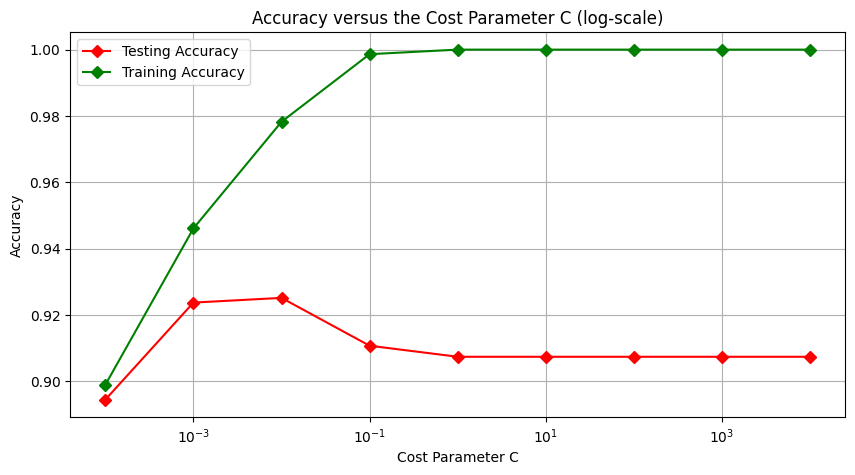

In [ ]:
c = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

plt.subplots(figsize=(10, 5))
plt.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")
plt.semilogx(c, acc_tr,'-gD' , label="Training Accuracy")
plt.grid(True)
plt.xlabel("Cost Parameter C")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy versus the Cost Parameter C (log-scale)')
plt.show()

In [ ]:
coefficient = []
n_supp = []
sup_vec = []
acc = []
acc_tr = []
i = 0
df = pd.DataFrame(columns = ['c','degree','train_acc','test_acc'])
for c in [0.001,0.01,0.1,1,10,100]:
    for degree in [2,3,4,5,10]:
        svm = SVC(kernel='poly', C=c, degree=degree)
        model = svm.fit(X_train, y_train)
        globals()['model%s' % i] = model
        d_coef = svm.dual_coef_
        support = svm.n_support_
        sv = svm.support_

        p_tr = svm.predict(X_train)
        a_tr = accuracy_score(y_train, p_tr)

        pred = svm.predict(X_test)
        a = accuracy_score(y_test, pred)

        coefficient.append(d_coef)
        n_supp.append(support)
        sup_vec.append(sv)
        acc_tr.append(a_tr)
        acc.append(a)
        df.loc[i] = [c,degree,a_tr,a]
        i=i+1

In [ ]:
df

,c,degree,train_acc,test_acc
0,0.001,2.0,0.121390,0.107250
1,0.001,3.0,0.127516,0.109333
2,0.001,4.0,0.137517,0.114333
3,0.001,5.0,0.146643,0.119000
4,0.001,10.0,0.186398,0.133500
5,0.010,2.0,0.205276,0.189083
6,0.010,3.0,0.183023,0.156833
7,0.010,4.0,0.178397,0.149333
8,0.010,5.0,0.183398,0.148667
9,0.010,10.0,0.221278,0.151667


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
_df_0['c'].plot(kind='hist', bins=20, title='c')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['degree'].plot(kind='hist', bins=20, title='degree')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['train_acc'].plot(kind='hist', bins=20, title='train_acc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['test_acc'].plot(kind='hist', bins=20, title='test_acc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='c', y='degree', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='degree', y='train_acc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='train_acc', y='test_acc', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['c']
  ys = series['degree']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('c', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('c')
_ = plt.ylabel('degree')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['c']
  ys = series['train_acc']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('c', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('c')
_ = plt.ylabel('train_acc')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['c']
  ys = series['test_acc']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('c', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('c')
_ = plt.ylabel('test_acc')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['c']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'c'}, axis=1)
              .sort_values('c', ascending=True))
  xs = counted['c']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('c', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('c')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['c'].plot(kind='line', figsize=(8, 4), title='c')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['degree'].plot(kind='line', figsize=(8, 4), title='degree')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['train_acc'].plot(kind='line', figsize=(8, 4), title='train_acc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['test_acc'].plot(kind='line', figsize=(8, 4), title='test_acc')
plt.gca().spines[['top', 'right']].set_visible(False)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
coefficient = []
n_supp = []
sup_vec = []
i = 0
df = pd.DataFrame(columns = ['c','gamma','train_acc','test_acc'])
for c in [0.01, 0.1, 1, 10, 100]:
    for g in [0.01, 0.1, 1, 10, 100]:
        svm = SVC(kernel='rbf', C=c, gamma=g)
        model = svm.fit(X_train, y_train)
        globals()['model%s' % i] = model
        d_coef = svm.dual_coef_
        support = svm.n_support_
        sv = svm.support_

        p_tr = svm.predict(X_train)
        a_tr = accuracy_score(y_train, p_tr)

        pred = svm.predict(X_test)
        a = accuracy_score(y_test, pred)

        coefficient.append(d_coef)
        n_supp.append(support)
        sup_vec.append(sv)
        df.loc[i] = [c,g,a_tr,a]
        i=i+1

In [ ]:
df